## COVID-19

#### What is Covid-19?

COVID-1

### **Ask**
##### Objectives and findings from this data

* Fin

##### Importing the data and installing/loading packages.

In [1]:
# 1.1 Packages
install.packages("xts")
install.packages("zoo")
install.packages("tsibble")
install.packages("dplyr")
install.packages("tidyverse")
install.packages("readxl")
install.packages("data.table")
install.packages("frequency")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lifecycle’, ‘rlang’


Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘lifecycle’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘cpp11’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

War

In [2]:
library(zoo)
library(xts)
library(tsibble)
library(dplyr)
library(tidyverse)
library(readxl)
library(data.table)  
library(frequency)
library(lubridate)
library(readr)
library(stringr) 
library(doBy)
library(ggplot2)
library(scales)
library(RColorBrewer)
library(corrplot)
library(doBy)
library(dplyr) 
library(randomForest)
library(gridExtra)
library(DataExplorer)
library(tidyverse)
library(ranger)
library(caret)
library(descr)
library(ggthemes)
library(reshape2)
library(viridis)
library(ggrepel)
library(corrplot)
library(caret)
library(skimr)
library(plotly)
library(data.table)
library(readxl) 



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘tsibble’


The following object is masked from ‘package:zoo’:

    index


The following objects are masked from ‘package:base’:

    intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:xts’:

    first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::first()  masks xts::first()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::last()   masks

In [11]:
list.files(path = '../input/corona-virus-report/')

[1] "country_wise_latest.csv"     "covid_19_clean_complete.csv"
[3] "day_wise.csv"                "full_grouped.csv"           
[5] "usa_county_wise.csv"         "worldometer_data.csv"

In [12]:
country_wise_latest <-  read.csv("../input/corona-virus-report/country_wise_latest.csv")
str(country_wise_latest)

'data.frame':	187 obs. of  15 variables:
 $ Country.Region        : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed             : int  36263 4880 27973 907 950 86 167416 37390 15303 20558 ...
 $ Deaths                : int  1269 144 1163 52 41 3 3059 711 167 713 ...
 $ Recovered             : int  25198 2745 18837 803 242 65 72575 26665 9311 18246 ...
 $ Active                : int  9796 1991 7973 52 667 18 91782 10014 5825 1599 ...
 $ New.cases             : int  106 117 616 10 18 4 4890 73 368 86 ...
 $ New.deaths            : int  10 6 8 0 1 0 120 6 6 1 ...
 $ New.recovered         : int  18 63 749 0 0 5 2057 187 137 37 ...
 $ Deaths...100.Cases    : num  3.5 2.95 4.16 5.73 4.32 3.49 1.83 1.9 1.09 3.47 ...
 $ Recovered...100.Cases : num  69.5 56.2 67.3 88.5 25.5 ...
 $ Deaths...100.Recovered: num  5.04 5.25 6.17 6.48 16.94 ...
 $ Confirmed.last.week   : int  35526 4171 23691 884 749 76 130774 34981 12428 19743 ...
 $ X1.week.change        : int  737 709 4282 23 201

In [13]:
full_grouped <-  read.csv("../input/corona-virus-report/full_grouped.csv")

In [14]:
str(full_grouped)

'data.frame':	35156 obs. of  10 variables:
 $ Date          : chr  "2020-01-22" "2020-01-22" "2020-01-22" "2020-01-22" ...
 $ Country.Region: chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Confirmed     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Active        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ New.cases     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ New.deaths    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ New.recovered : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WHO.Region    : chr  "Eastern Mediterranean" "Europe" "Africa" "Europe" ...


In [16]:
freq(full_grouped$Country.Region, plot=F) 
rownames(full_grouped_freq)

,Frequency,Percent
Afghanistan,188,0.5347594
Albania,188,0.5347594
Algeria,188,0.5347594
Andorra,188,0.5347594
Angola,188,0.5347594
Antigua and Barbuda,188,0.5347594
Argentina,188,0.5347594
Armenia,188,0.5347594
Australia,188,0.5347594
Austria,188,0.5347594


ERROR: Error in rownames(full_grouped_freq): object 'full_grouped_freq' not found


In [17]:
full_grouped %>% filter(Country.Region=="South Korea") -> covid19_south_korea

In [18]:
head(covid19_south_korea, 5)


,Date,Country.Region,Confirmed,Deaths,Recovered,Active,New.cases,New.deaths,New.recovered,WHO.Region
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,2020-01-22,South Korea,1,0,0,1,0,0,0,Western Pacific
2,2020-01-23,South Korea,1,0,0,1,0,0,0,Western Pacific
3,2020-01-24,South Korea,2,0,0,2,1,0,0,Western Pacific
4,2020-01-25,South Korea,2,0,0,2,0,0,0,Western Pacific
5,2020-01-26,South Korea,3,0,0,3,1,0,0,Western Pacific


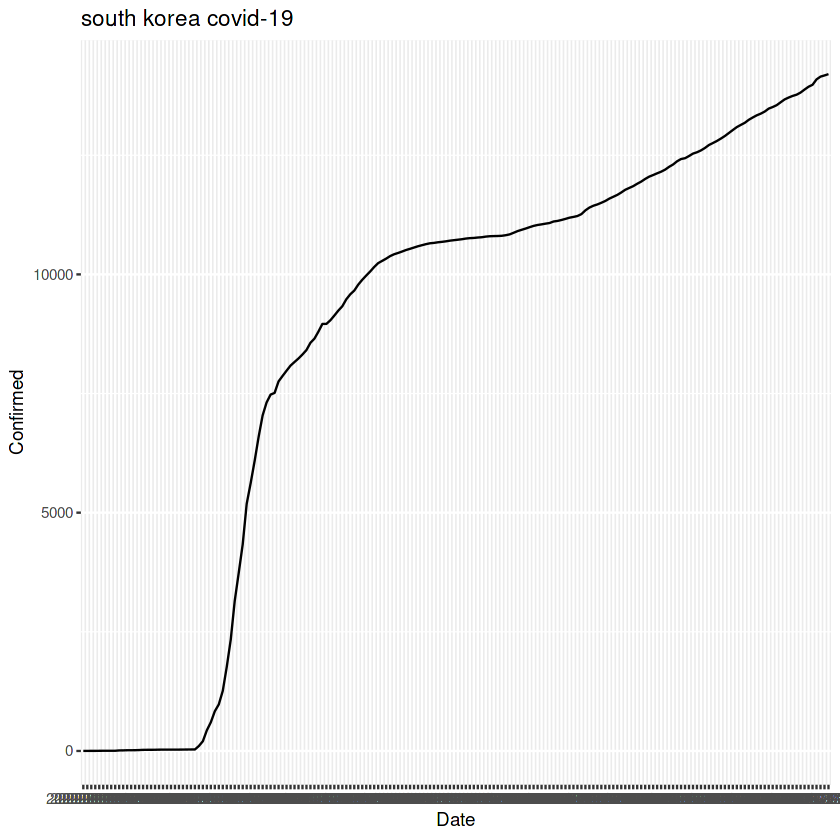

In [19]:
covid19_south_korea %>%
  ggplot(aes(x = Date, y = Confirmed)) + 
  geom_line(aes(group = 1)) +
  labs(title = 'south korea covid-19')

### **Prepare**

The dataset was coll conduct my analysis.

### **Clean**

##### **The da

In [ ]:
head(covid19)

### **Analyze**
#### Activion
##### Baset.

##### Based

##### Based on the

#### Regions
##### Basest.